# afternoon

In [9]:
from tqdm import tqdm


In [1]:
import json
data = []
with   open('WSJ_20170607_to_20170726_10AmTo4Pm.json', encoding="utf-8") as f:
  for line in f:
    data.append(json.loads(line))
texts = [e['content'] for e in data]

In [2]:
len(texts)

2062

In [8]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
import random
import csv
random.seed(555)
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

k = 5

vec = TfidfVectorizer(min_df=5, max_df=.4, stop_words="english")
features = vec.fit_transform(texts)
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
predictions = km.fit_predict(features)


In [19]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()

print("Top terms per cluster:")

for i in range(k):
    print("Cluster {}: ".format(i), end='')
    for ind in order_centroids[i, :10]:
        print("{} ".format(terms[ind]), end='')
    print()

Top terms per cluster:
Cluster 0: says ms people home city just york old police dr 
Cluster 1: china oil chinese prices production gold opec beijing crude barrels 
Cluster 2: trump eu president state government house senate russian russia tax 
Cluster 3: fed inflation bank bond rate ecb central rates policy yields 
Cluster 4: company billion sales million companies business market quarter shares investors 


In [35]:
# For 1 to 15 cluster centers
wss = []
for i in range(2, 10):
    print(i)
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=5)
    km.fit(features)
    wss.append(km.inertia_)


2
3
4
5
6
7
8
9


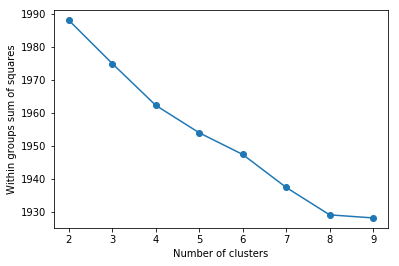

In [36]:
# Plot total within sum of squares vs. number of clusters
plt.plot(range(2, 10), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within groups sum of squares')
plt.show()



In [25]:

k = 8

vec = TfidfVectorizer(min_df=5, max_df=.4, stop_words="english")
features = vec.fit_transform(texts)
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
predictions = km.fit_predict(features)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()

print("Top terms per cluster:")

for i in range(k):
    print("Cluster {}: ".format(i), end='')
    for ind in order_centroids[i, :10]:
        print("{} ".format(terms[ind]), end='')
    print()

Top terms per cluster:
Cluster 0: company sales billion million amazon google revenue companies shares business 
Cluster 1: oil qatar saudi arabia opec crude barrels production gas prices 
Cluster 2: trump russian president russia house white comey administration sanctions investigation 
Cluster 3: health care senate tax republicans medicaid aca insurance gop hospital 
Cluster 4: china billion bank chinese banks investors debt financial companies market 
Cluster 5: eu state government brexit european party islamic minister court police 
Cluster 6: fed inflation bank bond ecb rate central rates policy yields 
Cluster 7: says ms people home city just york work old million 


In [27]:
output = zip(predictions,texts)
with open("clusteroutput.csv", mode="w") as f:
    writer=csv.writer(f)
    writer.writerows(output)

In [32]:
import pandas as pd
df = pd.read_csv("clusteroutput.csv", header=None)
df.columns = ["cluster", "text"]
df.head()

,cluster,text
0,0,"Uber Technologies Inc., trying to reshape its ..."
1,5,BERLIN—German Chancellor Angela Merkel ...
2,3,WASHINGTON—Democrats have begun escalating the...
3,7,Rapper Lil Wayne has sold his high...
4,7,Coffee prices fell to a one-year low Tuesday a...


In [33]:
df.cluster.value_counts()

7    777
4    329
0    316
5    217
2    141
6    122
3     81
1     79
Name: cluster, dtype: int64

In [38]:
km.cluster_centers_[0]

array([0.02166551, 0.        , 0.        , ..., 0.0012837 , 0.        ,
       0.        ])

In [43]:
import numpy as np
dist = 

In [46]:
dists_to_cl0 = []
for i in range(len(texts)):
    dists_to_cl0.append(np.linalg.norm(km.cluster_centers_[0] - features[i]))

In [51]:
d = pd.DataFrame({"texts": texts, "dist": dists_to_cl0})
d

,dist,texts
0,1.007984,"Uber Technologies Inc., trying to reshape its ..."
1,1.001290,BERLIN—German Chancellor Angela Merkel ...
2,0.992497,WASHINGTON—Democrats have begun escalating the...
3,0.969718,Rapper Lil Wayne has sold his high...
4,1.005473,Coffee prices fell to a one-year low Tuesday a...
5,1.006259,"Copper prices fell to a two-week low Tuesday, ..."
6,0.993699,Amazon.com Inc. AMZN 0.24% is giv...
7,1.000473,Nestlé SA NSRGY 0.52% has bought ...
8,1.004762,"BAGHDAD—Iraqi forces are using small, off-the-..."
9,1.005151,One of the many ironies of the Theresa M...


In [56]:
d.sort_values(by="dist")

,dist,texts
596,0.214066,
835,0.939700,Roughly three million potential first-time hom...
245,0.942194,Brendon Craigie was searching for a city somew...
246,0.943433,James Bond meets Midcentury Modern. Italianate...
1017,0.951141,The controversy over Obamacare and now the rau...
189,0.951417,The first time Angelo Smyrnios pulled up in fr...
322,0.951677,"There’s no grocery store, hospital or police s..."
1075,0.951730,Nine years after the last condominium craze fa...
1871,0.952109,After superstorm Sandy nearly destroyed a Broo...
1785,0.953926,"Sam Zell’s new book, Am I Being Too Subt..."
